Plot annotate
---------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
x = np.random.randint(0,1000,100)
y = np.random.rand(100)
n = x.copy

print x.shape, y.shape

(100,) (100,)


In [34]:
print x[0], y[0]

61 0.452803691672


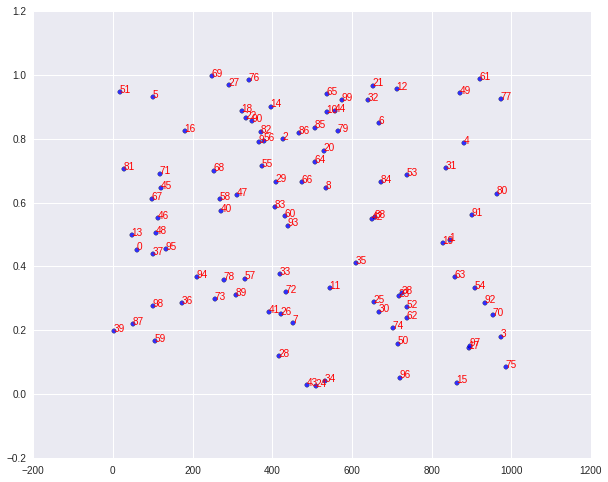

In [43]:
plt.figure(figsize=(10, 8))
plt.scatter(x,y, alpha=0.8)
for i in range(x.shape[0]):
    plt.annotate(str(i), (x[i], y[i]), xycoords='data',
            xytext=(x[i], y[i]), textcoords='data',two
            fontsize=10, color='r'
#             arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
plt.show()

## Plot mean

In [19]:
# xs = [11,23,30,47,56]
xs = [11,23,30,47,56, 68]
print xs

[11, 23, 30, 47, 56, 68]


In [20]:
mean_xs = np.mean(xs)
std_xs = np.std(xs)
median_xs = np.median(xs)

print "MEAN: {}".format(mean_xs)
print "SD: {}".format(std_xs)
print "MEDIAN: {}".format(median_xs)

MEAN: 39.1666666667
SD: 19.6419336002
MEDIAN: 38.5


In [21]:
1.0 * (30 + 47) / 2

38.5

## L2 length norm

In [45]:
def get_L2(x):
    norm = np.sqrt((x**2).sum(-1))
    return 1.0 * x/norm

In [46]:
x = np.array(np.random.random((1,2)))
print x

[[ 0.50207637  0.29876779]]


In [47]:
get_L2(x[0,:])

array([ 0.85935847,  0.51137366])

In [50]:
get_L2(np.array([0,1,0,100]))

array([ 0.       ,  0.0099995,  0.       ,  0.99995  ])

## VSM: Weighting

In [53]:
WD = np.asfarray([[10,10,10,10], [10,10,10,0], [10,10,0,0], [0,0,0,1]])

In [54]:
print WD

[[ 10.  10.  10.  10.]
 [ 10.  10.  10.   0.]
 [ 10.  10.   0.   0.]
 [  0.   0.   0.   1.]]


## L2 Norm by W,D

In [64]:
from sklearn.preprocessing import normalize

In [65]:
WD_L2W = normalize(WD, axis=1)
print WD_L2W

[[ 0.5         0.5         0.5         0.5       ]
 [ 0.57735027  0.57735027  0.57735027  0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [66]:
WD_L2D = normalize(WD, axis=0)
print WD_L2D

[[ 0.57735027  0.57735027  0.70710678  0.99503719]
 [ 0.57735027  0.57735027  0.70710678  0.        ]
 [ 0.57735027  0.57735027  0.          0.        ]
 [ 0.          0.          0.          0.09950372]]


## TFIDF

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

In [63]:
WD_tf = TfidfTransformer(sublinear_tf=True).fit_transform(WD)
WD_tf = WD_tf.toarray()
print WD_tf

[[ 0.44493104  0.44493104  0.54957835  0.54957835]
 [ 0.53256952  0.53256952  0.65782931  0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [58]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

## Cosine sim

In [60]:
WW = cosine_similarity(WD)
DD = cosine_similarity(WD)

In [61]:
print WW

[[ 1.          0.8660254   0.70710678  0.5       ]
 [ 0.8660254   1.          0.81649658  0.        ]
 [ 0.70710678  0.81649658  1.          0.        ]
 [ 0.5         0.          0.          1.        ]]


In [62]:
print DD

[[ 1.          0.8660254   0.70710678  0.5       ]
 [ 0.8660254   1.          0.81649658  0.        ]
 [ 0.70710678  0.81649658  1.          0.        ]
 [ 0.5         0.          0.          1.        ]]


## PMI

In [71]:
def get_PMI(X):
    total_sum = np.sum(X)
    pwd = X / total_sum
    pw = np.sum(pwd, axis=1)
    pd = np.sum(pwd, axis=0)
    return np.log(pwd / (pw * pd))

In [72]:
WD_PMI = get_PMI(WD)

In [75]:
WD_PMI = np.nan_to_num(WD_PMI)

In [76]:
print WD_PMI

[[ -2.76632236e-001   1.10498362e-002   8.21980052e-001   4.41554933e+000]
 [ -2.76632236e-001   1.10498362e-002   8.21980052e-001  -1.79769313e+308]
 [ -2.76632236e-001   1.10498362e-002  -1.79769313e+308  -1.79769313e+308]
 [ -1.79769313e+308  -1.79769313e+308  -1.79769313e+308   2.11296423e+000]]


## Distance choices

In [82]:
X = [[2,4], [10,15], [14,10]]
X = np.asfarray(X)

In [83]:
print X

[[  2.   4.]
 [ 10.  15.]
 [ 14.  10.]]


In [84]:
X_norm = normalize(X, axis=1)
print X_norm

[[ 0.4472136   0.89442719]
 [ 0.5547002   0.83205029]
 [ 0.81373347  0.58123819]]


In [85]:
X_cosine = cosine_similarity(X)
print X_cosine

[[ 1.          0.99227788  0.88378792]
 [ 0.99227788  1.          0.93499753]
 [ 0.88378792  0.93499753  1.        ]]


In [86]:
from sklearn.metrics import euclidean_distances

In [87]:
A = X[0,:]
B = X[1,:]
C = X[2,:]

In [89]:
euclidean_distances(np.vstack((A,B)))

array([[  0.        ,  13.60147051],
       [ 13.60147051,   0.        ]])

In [90]:
euclidean_distances(np.vstack((B,C)))

array([[ 0.        ,  6.40312424],
       [ 6.40312424,  0.        ]])

> B,C are closer than A,B

In [91]:
cosine_distances(np.vstack((A,B)))

array([[  1.11022302e-16,   7.72212329e-03],
       [  7.72212329e-03,   0.00000000e+00]])

In [92]:
cosine_distances(np.vstack((B,C)))

array([[ 0.        ,  0.06500247],
       [ 0.06500247,  0.        ]])

In [93]:
1 - X_cosine

array([[  1.11022302e-16,   7.72212329e-03,   1.16212084e-01],
       [  7.72212329e-03,   0.00000000e+00,   6.50024737e-02],
       [  1.16212084e-01,   6.50024737e-02,   0.00000000e+00]])

In [94]:
cosine_distances(np.vstack((X_norm[1,:],X_norm[2,:])))

array([[ 0.        ,  0.06500247],
       [ 0.06500247,  0.        ]])

> Cosine A,B eliminate the strength/freq and focus on real angle of sim